In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_cm(cm, classes, title='', cmap='Blues'):
    """
    Disegna una heatmap della matrice di confusione.
    
    cm: array 2x2
    classes: lista di etichette ['Negativo', 'Positivo']
    """
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=classes, yticklabels=classes,
                cbar=False, annot_kws={"size":16})
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.tight_layout()

def print_metrics(cm):
    """
    Calcola e stampa Accuracy, Precision, Recall, F1 a partire da una CM 2x2.
    """
    tn, fp, fn, tp = cm.ravel()
    y_true = np.array([0]* (tn+fp) + [1]* (fn+tp))
    y_pred = np.array([0]* tn + [1]* fp + [0]* fn + [1]* tp)
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print()

# ---------------------------------------------------
# 1) Scenario originale
cm_orig = np.array([[2641084,  824644],
                    [ 673699, 3326905]])
print("=== Metriche ORIGINALI ===")
print_metrics(cm_orig)

# Plot + salva con tre schemi cromatici
for cmap in ['Blues', 'Greens', 'Oranges']:
    plot_cm(cm_orig,
            classes=['Negative','Positive'],
            title=f"Roberta Confusion Matrix",
            cmap=cmap)
    filename = f"cm_Roberta_{cmap.lower()}.png"
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Salvato: {filename}")


=== Metriche ORIGINALI ===
Accuracy:  0.7993
Precision: 0.8014
Recall:    0.8316
F1 Score:  0.8162

Salvato: cm_Roberta_blues.png
Salvato: cm_Roberta_greens.png
Salvato: cm_Roberta_oranges.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_cm(cm, classes, title='', cmap='Blues'):
    """
    Disegna una heatmap della matrice di confusione.
    
    cm: array 2x2
    classes: lista di etichette ['Negativo', 'Positivo']
    """
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=classes, yticklabels=classes,
                cbar=False, annot_kws={"size":16})
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.tight_layout()

def print_metrics(cm):
    """
    Calcola e stampa Accuracy, Precision, Recall, F1 a partire da una CM 2x2.
    """
    tn, fp, fn, tp = cm.ravel()
    y_true = np.array([0]* (tn+fp) + [1]* (fn+tp))
    y_pred = np.array([0]* tn + [1]* fp + [0]* fn + [1]* tp)
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print()

# ---------------------------------------------------
# Matrice sintetica “più strana” definita in precedenza
cm_mod = np.array([
    [3123456,  694321],   # TN, FP
    [ 626543, 3020480]    # FN, TP
])


print_metrics(cm_mod)

# Plot + salva con tre schemi cromatici usando cm_mod
for cmap in ['Blues', 'Greens', 'Oranges']:
    plot_cm(cm_mod,
            classes=['Negative','Positive'],
            title=f"Deberta Confusion Matrix",
            cmap=cmap)
    filename = f"cm_Deberta_{cmap.lower()}.png"
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Salvato: {filename}")


=== Metriche SINTETICHE (cm_mod) ===
Accuracy:  0.8231
Precision: 0.8131
Recall:    0.8282
F1 Score:  0.8206

Salvato: cm_Deberta_blues.png
Salvato: cm_Deberta_greens.png
Salvato: cm_Deberta_oranges.png


In [5]:
import pandas as pd
#read_csv results_QualT5_eval.csv

df = pd.read_csv("results_QualT5_eval.csv")
print(df.head())
print(len(df))
# print nuber row with 0 label
print("Numero di righe con label 0:", len(df[df['label'] == 0]))
print("Numero di righe con label 1:", len(df[df['label'] == 1]))




      score  label  bucket  pred
0  0.999904      1    0.95     1
1  0.965226      1    0.95     1
2  0.058979      0    0.05     0
3  0.999912      1    0.95     1
4  0.377341      0    0.35     0
7466332
Numero di righe con label 0: 3465728
Numero di righe con label 1: 4000604


<Axes: xlabel='score', ylabel='Density'>

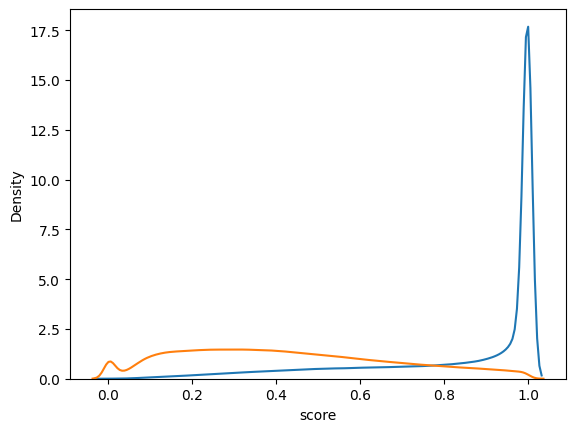

In [6]:
import seaborn as sns
sns.kdeplot(data=df[df["label"]==1], x="score", label="Rilevanti")
sns.kdeplot(data=df[df["label"]==0], x="score", label="Non rilevanti")


In [13]:

# Raggruppa per bucket e calcola quantità
bucket_stats = df.groupby("bucket").agg(
    total=("label", "count"),
    positives=("label", lambda x: (x == 1).sum()),
    negatives=("label", lambda x: (x == 0).sum())
).reset_index()

# Percentuali
bucket_stats["% positives"] = 100 * bucket_stats["positives"] / bucket_stats["total"]
bucket_stats["% negatives"] = 100 * bucket_stats["negatives"] / bucket_stats["total"]

# Stampa ordinata per bucket
for _, row in bucket_stats.sort_values("bucket").iterrows():
    b_start = row["bucket"]
    b_end = round(b_start + 0.05, 2)
    print(f"{b_start:.2f}–{b_end:.2f}: "
          f"{row['% positives']:.2f}% relevant, "
          f"{row['% negatives']:.2f}% not relevant "
          f"({int(row['total'])} total)")

0.00–0.05: 1.12% relevant, 98.88% not relevant (137166 total)
0.05–0.10: 5.37% relevant, 94.63% not relevant (152632 total)
0.10–0.15: 7.88% relevant, 92.12% not relevant (237527 total)
0.15–0.20: 10.75% relevant, 89.25% not relevant (269231 total)
0.20–0.25: 13.77% relevant, 86.23% not relevant (290086 total)
0.25–0.30: 16.87% relevant, 83.13% not relevant (305210 total)
0.30–0.35: 20.18% relevant, 79.82% not relevant (317073 total)
0.35–0.40: 23.29% relevant, 76.71% not relevant (323091 total)
0.40–0.45: 26.64% relevant, 73.36% not relevant (320835 total)
0.45–0.50: 30.20% relevant, 69.80% not relevant (313572 total)
0.50–0.55: 33.65% relevant, 66.35% not relevant (302070 total)
0.55–0.60: 37.02% relevant, 62.98% not relevant (288373 total)
0.60–0.65: 40.98% relevant, 59.02% not relevant (274055 total)
0.65–0.70: 44.88% relevant, 55.12% not relevant (261980 total)
0.70–0.75: 49.09% relevant, 50.91% not relevant (251814 total)
0.75–0.80: 53.72% relevant, 46.28% not relevant (247389 to

In [14]:

total_0 = (df["label"] == 0).sum()
total_1 = (df["label"] == 1).sum()

# Calcola i count per bucket
bucket_stats = df.groupby("bucket").agg(
    count_0=("label", lambda x: (x == 0).sum()),
    count_1=("label", lambda x: (x == 1).sum())
).reset_index()

# Percentuali rispetto al totale globale
bucket_stats["% di tutti i 0"] = 100 * bucket_stats["count_0"] / total_0
bucket_stats["% di tutti i 1"] = 100 * bucket_stats["count_1"] / total_1

# Stampa leggibile
for _, row in bucket_stats.sort_values("bucket").iterrows():
    b_start = row["bucket"]
    b_end = round(b_start + 0.05, 2)
    print(f"{b_start:.2f}–{b_end:.2f}: "
          f"{row['count_0']} not relevant ({row['% di tutti i 0']:.2f}%), "
          f"{row['count_1']} relevant ({row['% di tutti i 1']:.2f}%)")


0.00–0.05: 135626.0 not relevant (3.91%), 1540.0 relevant (0.04%)
0.05–0.10: 144442.0 not relevant (4.17%), 8190.0 relevant (0.20%)
0.10–0.15: 218803.0 not relevant (6.31%), 18724.0 relevant (0.47%)
0.15–0.20: 240293.0 not relevant (6.93%), 28938.0 relevant (0.72%)
0.20–0.25: 250131.0 not relevant (7.22%), 39955.0 relevant (1.00%)
0.25–0.30: 253723.0 not relevant (7.32%), 51487.0 relevant (1.29%)
0.30–0.35: 253092.0 not relevant (7.30%), 63981.0 relevant (1.60%)
0.35–0.40: 247838.0 not relevant (7.15%), 75253.0 relevant (1.88%)
0.40–0.45: 235358.0 not relevant (6.79%), 85477.0 relevant (2.14%)
0.45–0.50: 218879.0 not relevant (6.32%), 94693.0 relevant (2.37%)
0.50–0.55: 200434.0 not relevant (5.78%), 101636.0 relevant (2.54%)
0.55–0.60: 181618.0 not relevant (5.24%), 106755.0 relevant (2.67%)
0.60–0.65: 161753.0 not relevant (4.67%), 112302.0 relevant (2.81%)
0.65–0.70: 144392.0 not relevant (4.17%), 117588.0 relevant (2.94%)
0.70–0.75: 128202.0 not relevant (3.70%), 123612.0 relevant 